In [14]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [15]:
df=pd.read_csv("dataset-progetto/train.csv", skipinitialspace=True)

In [16]:
df[['name','artists']].describe()

,name,artists
count,15000,15000
unique,15000,6257
top,Long Road,Vybz Kartel
freq,1,80


In [17]:
df[df['artists'] == 'Vybz Kartel'] # mettere una condizione su un attributo

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
12,Beautiful Girl,218329,False,22,Vybz Kartel,Kingston Story (Deluxe Edition),0.792,0.854,7,-6.170,...,0.1080,0.829,110.010,218329,4.0,400.0,98.0,NaN,4.067086,j-dance
73,Tell Me If Yuh Like It,186666,True,22,Vybz Kartel,Tell Me If Yuh Like It,0.650,0.739,4,-4.554,...,0.0750,0.331,114.966,186667,5.0,354.0,87.0,0.972,0.916010,j-dance
665,Secret,221596,False,21,Vybz Kartel,Secret,0.777,0.930,8,-5.250,...,0.1180,0.867,104.023,221597,4.0,374.0,92.0,0.313,2.725904,j-dance
694,Nice Suh,161632,False,0,Vybz Kartel,Nice Suh,0.626,0.676,9,-7.241,...,0.1280,0.373,195.932,161633,4.0,509.0,128.0,NaN,1.343558,j-dance
720,Black Woman,173871,False,20,Vybz Kartel,Black Woman,0.505,0.620,2,-8.328,...,0.0734,0.547,130.637,173871,5.0,372.0,92.0,0.042,3.700483,j-dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13510,Life Me Say,132000,True,22,Vybz Kartel,Reggae Love Songs Deluxe Edition,0.619,0.499,2,-8.730,...,0.2080,0.278,159.906,132000,4.0,295.0,73.0,NaN,3.700483,j-dance
14327,How Mi Grow,144000,False,0,Vybz Kartel,Farr Out,0.605,0.798,1,-4.436,...,0.0612,0.942,94.190,144000,4.0,224.0,56.0,0.657,2.367412,j-dance
14906,Tip,189333,True,22,Vybz Kartel,Dancehall Posse Riddim,0.690,0.729,9,-4.980,...,0.0740,0.713,119.409,189333,5.0,370.0,92.0,NaN,1.343558,j-dance
14910,Yea Through I Walk,212813,False,20,Vybz Kartel,Pon Di Gaza 2.0,0.510,0.838,8,-6.631,...,0.1200,0.541,165.706,212813,4.0,582.0,146.0,NaN,2.725904,j-dance


## controllo la popolarità per genere 

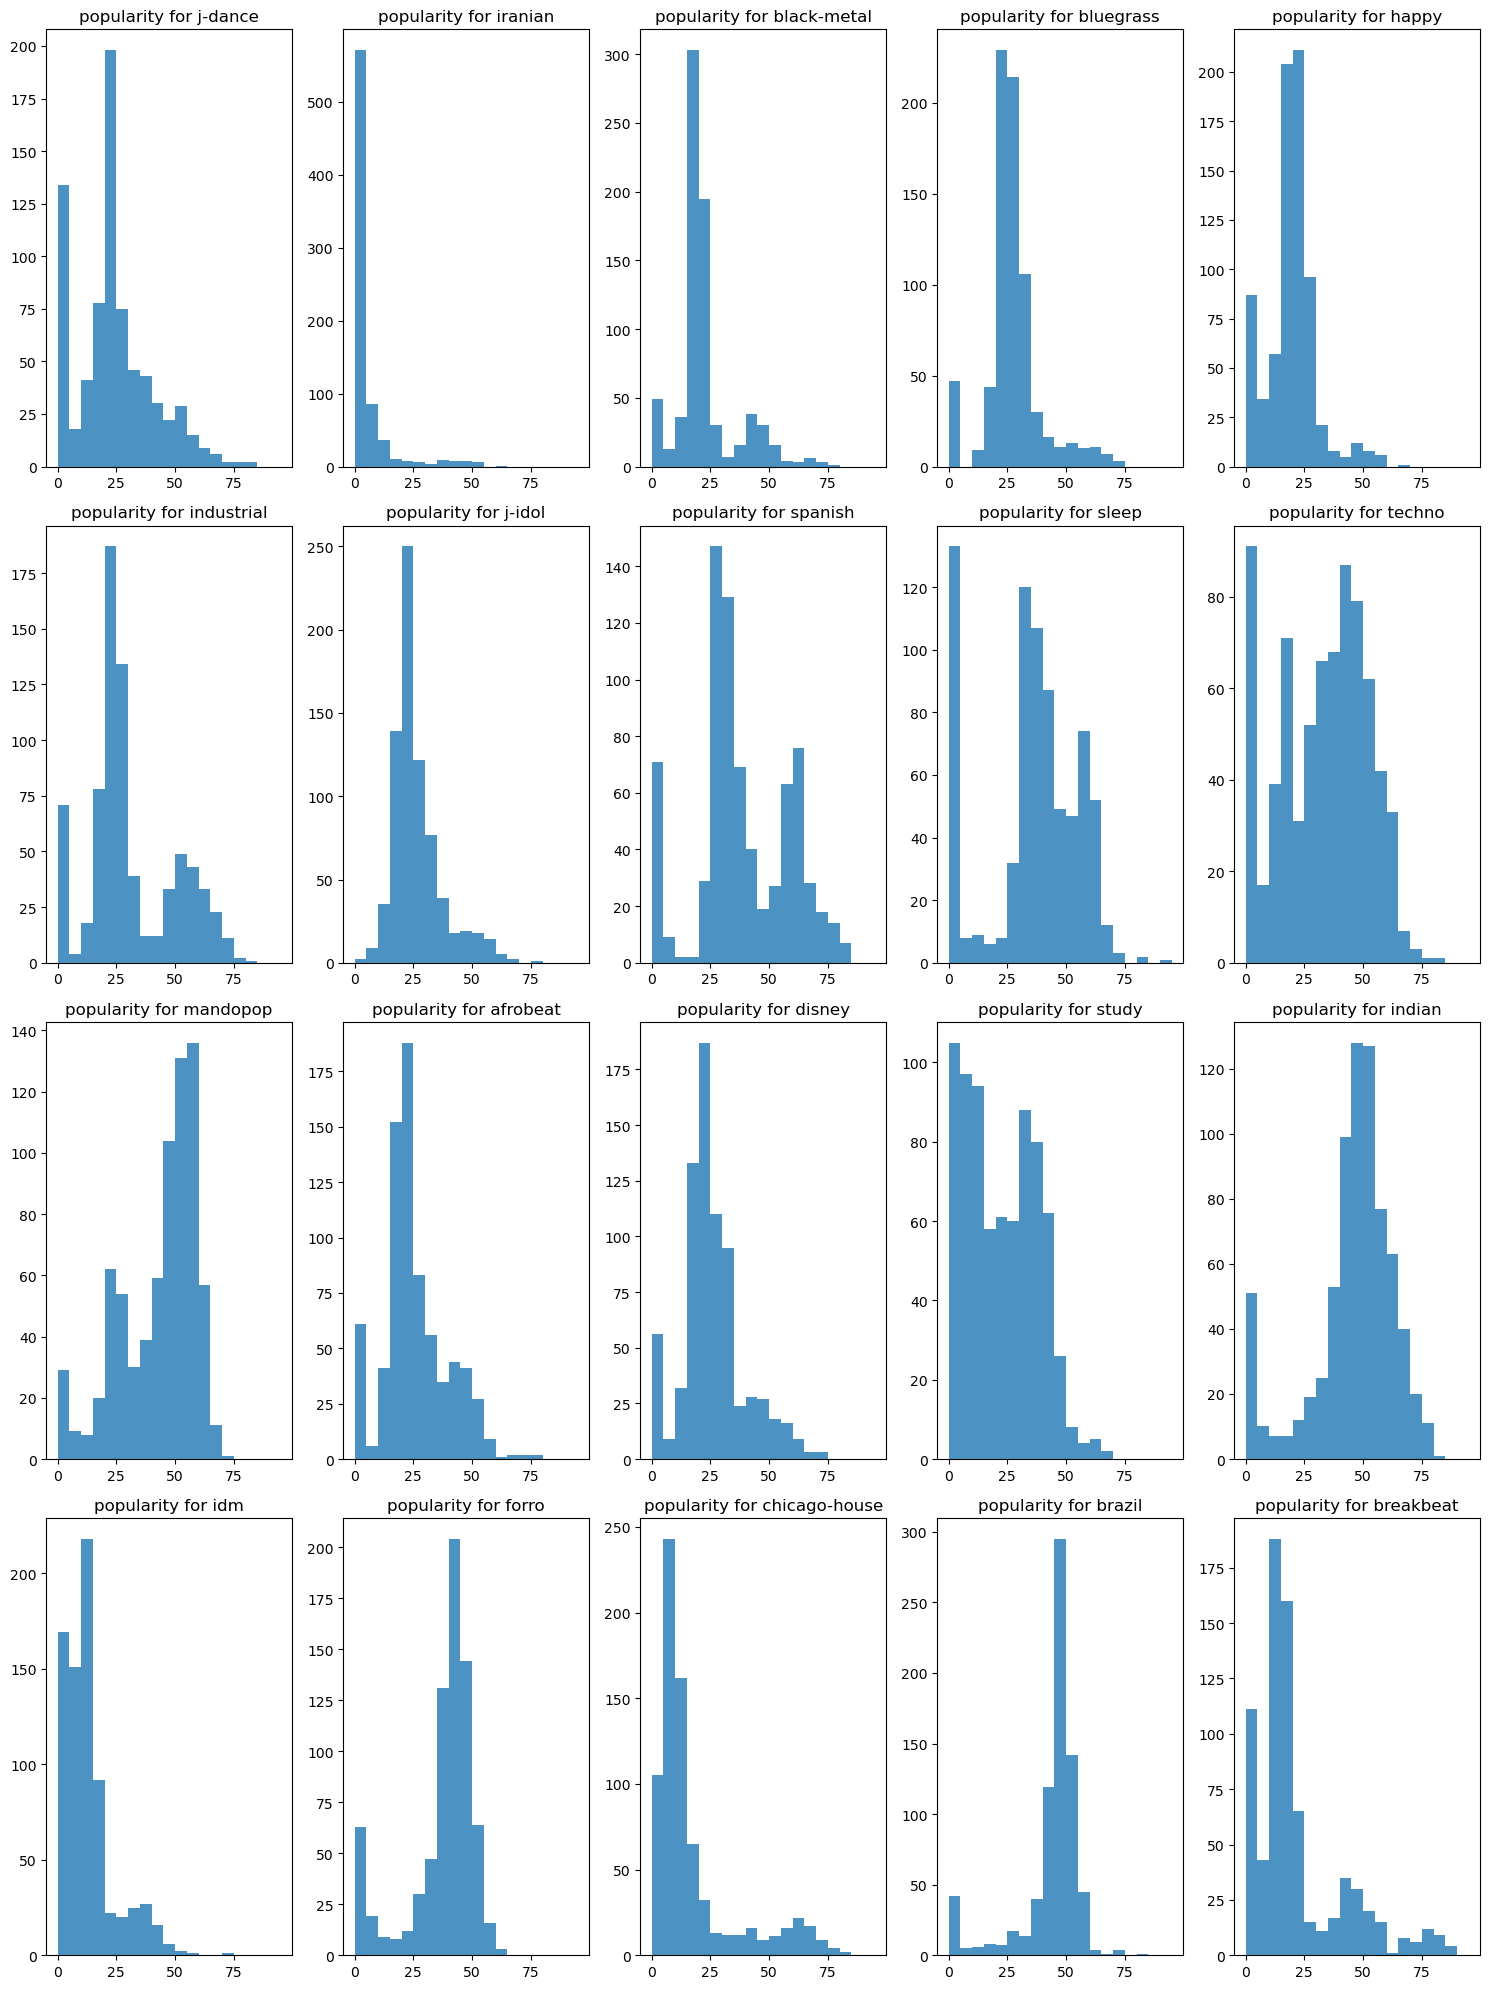

In [72]:
# uso un ciclo x fare un istogramma x la popularity di ogni genre
num_categories = len(df['genre'].unique())  #Calcola il numero di categorie uniche
num_cols = 5  #numero di colonne per la griglia
num_rows = (num_categories + num_cols - 1) // num_cols # Calcola il numero di righe  in base alle colonne
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows)) # Imposta le dimensioni della figura in base al numero di colonne

# Ciclo per ogni categoria unica in 'genre' e disegna l'istogramma su un subplot
for i, v in enumerate(df['genre'].unique()):
    row = i // num_cols
    col = i % num_cols
    plt.sca(axs[row, col])  # Imposta l'asse corrente
    plt.hist(df[df['genre'] == v]['popularity'], bins=np.arange(0,100,5), alpha=0.8, label=v)
    plt.title('popularity for ' + v)


plt.tight_layout()  #migliore visualizzazione
plt.show()
